In [116]:
%matplotlib inline

In [117]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [118]:
import sys
sys.path.append('.')

import pandas as pd
import numpy as np
import incense
from incense import ExperimentLoader
import matplotlib.pyplot as plt
from src import settings

loader = ExperimentLoader(
    mongo_uri=settings.MONGO_DB_URL,
    db_name=settings.MONGO_DB_NAME
)

In [119]:
def find_similar(exp):
    """function to find based on hash.
    """
    hash_ = exp.to_dict()['config'][settings.EXP_HASH]
    return loader.find_by_config_key(settings.EXP_HASH, hash_)

def hash_based_bundle(exps):
    bundles = {}
    for exp in exps:
        hash_ = exp.to_dict()['config'][settings.EXP_HASH]
        if hash_ in bundles:
            bundles[hash_].append(exp)
        else:
            bundles[hash_] = [exp]
    return bundles

def get_bo_plots(exp):
    return {k: v for k,v in exp.artifacts.items() if k.startswith('bo-plot')}

# Show aggregate


In [120]:
# From one to all of same hash.

query = {"$and": [
            {"config.model.name": "GPModel"},
        ]}
exp = loader.find(query)[0]
exps = find_similar(exp)

In [121]:
# display name
# list of exp

def get_exp_key_col(exp):
    config = exp.to_dict()['config']
    return {
        'model': config['model']['name'],
        'model2': config.get('model2', {}).get('name', None),
        'acq': config.get('acquisition_function', {}).get('name'),
        'bo': bool(config.get('bo', None)),
        'f': config['obj_func']['name'],
        'config': config,
    }

exps = loader.find({'status': 'COMPLETED'})
bundles = hash_based_bundle(exps)
bundles = {k: dict(count=len(v), exps=v, **get_exp_key_col(v[0])) for k,v in bundles.items()}

df = pd.DataFrame.from_dict(bundles, orient='index')
df

,count,exps,model,model2,acq,bo,f,config
02a903aaf7b7b9f0a2164a43e56eed0c2c95f242,1,"[Experiment(id=109, name=lions)]",DKLGPModel,None,None,False,Step,{'exp_hash': '02a903aaf7b7b9f0a2164a43e56eed0c...
054b005191c3e0339a0b632abb05f8e867dba739,1,"[Experiment(id=140, name=lions)]",DKLGPModel,None,None,False,TwoKink1D,{'exp_hash': '054b005191c3e0339a0b632abb05f8e8...
063dfefe784a0babbea92e7f2747ac9322a61002,1,"[Experiment(id=4, name=lions)]",DKLGPModel,None,None,False,TwoKink1D,{'exp_hash': '063dfefe784a0babbea92e7f2747ac93...
09338db22ede4ec7ca103b462dfa2c111d6831bc,1,"[Experiment(id=70, name=lions)]",DKLGPModel,None,None,False,Kink1D,{'exp_hash': '09338db22ede4ec7ca103b462dfa2c11...
0e757079c7372e9bcc8f337de22cc36111767c6c,1,"[Experiment(id=114, name=lions)]",DKLGPModel,None,None,False,Step,{'exp_hash': '0e757079c7372e9bcc8f337de22cc361...
10c65b48190b6e65ca86957e92eeacdf3035082e,1,"[Experiment(id=6, name=lions)]",DKLGPModel,None,None,False,TwoKink1D,{'exp_hash': '10c65b48190b6e65ca86957e92eeacdf...
1140aeabb548f878cd07592d2061cbcde1e4012a,1,"[Experiment(id=92, name=lions)]",GPModel,None,None,False,Step,{'exp_hash': '1140aeabb548f878cd07592d2061cbcd...
118e30d81be48006428d68ff6daf24464cbb1a1d,1,"[Experiment(id=67, name=lions)]",DKLGPModel,None,None,False,Kink1D,{'exp_hash': '118e30d81be48006428d68ff6daf2446...
1191c9375be8d0cc5958ab6d1a301ce3807fa32a,1,"[Experiment(id=84, name=lions)]",DKLGPModel,None,None,False,Kink2D,{'exp_hash': '1191c9375be8d0cc5958ab6d1a301ce3...
11935d23bc9f3c799f8ea86d11c8b0e2bca76dab,1,"[Experiment(id=108, name=lions)]",DKLGPModel,None,None,False,Step,{'exp_hash': '11935d23bc9f3c799f8ea86d11c8b0e2...


## Plot BO CI

In [209]:
#exps_row = df.loc[df.bo == True].iloc[0]
exps_row = df.loc["60519fa6dbfe5a80969a4b30ddd14cafbf68612f"] # Kink1D
# exps_row = df.loc["75d24ad445d397dbe1a8add031764c707d37cfdf"] # IncreasingOscillationDecreasingAmplitude
exps = exps_row.exps

def get_rmse(exp):
    """Uses old `mse` as fallback."""
    return exp.metrics.get('rmse', exp.metrics.get('mse',pd.Series([])))

def plot_bo_regret(exps, label=None):
    df_concat = pd.concat([get_rmse(exp) for exp in exps], axis=1)
    mean = df_concat.mean(axis=1)
    var = df_concat.var(axis=1)
    plt.plot(df_concat.index, mean, label=label)
    plt.fill_between(df_concat.index, mean - 2 * np.sqrt(var), mean + 2 * np.sqrt(var), alpha=0.2)

KeyError: '60519fa6dbfe5a80969a4b30ddd14cafbf68612f'

In [20]:
# Calculate mean and variance of MSE
# TODO: maybe not silence missing MSE...
plot_bo_regret(exps, label="Regret")
plt.legend()

NameError: name 'plot_bo_regret' is not defined

In [21]:
# Plot all last BO plot
# TODO: plot in grid
for i, exp in enumerate(exps):
    name, last_plot = sorted(get_bo_plots(exp).items())[-1]
    last_plot.show()
    plt.title("Experiment {}:".format(i))

IndexError: list index out of range

## Plot GP final MSE

In [122]:
exps_rows_df = df
#exps_rows_df = exps_rows_df.loc[exps_rows_df.bo == False]
#exps_rows_df = exps_rows_df[exps_rows_df.f == 'Kink1D']
#exps_rows_df = exps_rows_df[exps_rows_df.f == 'Kink2D']
#exps_rows_df = exps_rows_df[exps_rows_df.f == 'IncreasingOscillationDecreasingAmplitude']
#exps_rows_df = exps_rows_df[exps_rows_df.model == 'DKLGPModel']
exps_rows_df = exps_rows_df.copy()
exps_rows_df

,count,exps,model,model2,acq,bo,f,config
02a903aaf7b7b9f0a2164a43e56eed0c2c95f242,1,"[Experiment(id=109, name=lions)]",DKLGPModel,None,None,False,Step,{'exp_hash': '02a903aaf7b7b9f0a2164a43e56eed0c...
054b005191c3e0339a0b632abb05f8e867dba739,1,"[Experiment(id=140, name=lions)]",DKLGPModel,None,None,False,TwoKink1D,{'exp_hash': '054b005191c3e0339a0b632abb05f8e8...
063dfefe784a0babbea92e7f2747ac9322a61002,1,"[Experiment(id=4, name=lions)]",DKLGPModel,None,None,False,TwoKink1D,{'exp_hash': '063dfefe784a0babbea92e7f2747ac93...
09338db22ede4ec7ca103b462dfa2c111d6831bc,1,"[Experiment(id=70, name=lions)]",DKLGPModel,None,None,False,Kink1D,{'exp_hash': '09338db22ede4ec7ca103b462dfa2c11...
0e757079c7372e9bcc8f337de22cc36111767c6c,1,"[Experiment(id=114, name=lions)]",DKLGPModel,None,None,False,Step,{'exp_hash': '0e757079c7372e9bcc8f337de22cc361...
10c65b48190b6e65ca86957e92eeacdf3035082e,1,"[Experiment(id=6, name=lions)]",DKLGPModel,None,None,False,TwoKink1D,{'exp_hash': '10c65b48190b6e65ca86957e92eeacdf...
1140aeabb548f878cd07592d2061cbcde1e4012a,1,"[Experiment(id=92, name=lions)]",GPModel,None,None,False,Step,{'exp_hash': '1140aeabb548f878cd07592d2061cbcd...
118e30d81be48006428d68ff6daf24464cbb1a1d,1,"[Experiment(id=67, name=lions)]",DKLGPModel,None,None,False,Kink1D,{'exp_hash': '118e30d81be48006428d68ff6daf2446...
1191c9375be8d0cc5958ab6d1a301ce3807fa32a,1,"[Experiment(id=84, name=lions)]",DKLGPModel,None,None,False,Kink2D,{'exp_hash': '1191c9375be8d0cc5958ab6d1a301ce3...
11935d23bc9f3c799f8ea86d11c8b0e2bca76dab,1,"[Experiment(id=108, name=lions)]",DKLGPModel,None,None,False,Step,{'exp_hash': '11935d23bc9f3c799f8ea86d11c8b0e2...


In [123]:
# Stats on result
exps_rows_df['rmse'] = exps_rows_df.apply(lambda row: np.array([e.result for e in row.exps], dtype=np.float), axis=1)
exps_rows_df['rmse_mean'] = exps_rows_df.apply(lambda row: np.nanmean(row.rmse), axis=1)
exps_rows_df['rmse_var'] = exps_rows_df.apply(lambda row: np.nanvar(row.rmse), axis=1)

# Create short hand name for convinience
def get_name(row):
    name = row.model
    if row.bo: 
        name = name + " BO"
    if row.acq is not None: 
        name = name + " " + row.acq
    name = name + " " + row.f
    return name

exps_rows_df['name'] = exps_rows_df.apply(get_name, axis=1)
exps_rows_named_df = exps_rows_df.set_index('name')

exps_rows_named_df

,count,exps,model,model2,acq,bo,f,config,rmse,rmse_mean,rmse_var
name,,,,,,,,,,,
DKLGPModel Step,1,"[Experiment(id=109, name=lions)]",DKLGPModel,None,None,False,Step,{'exp_hash': '02a903aaf7b7b9f0a2164a43e56eed0c...,[0.7045458043935174],0.704546,0.000000e+00
DKLGPModel TwoKink1D,1,"[Experiment(id=140, name=lions)]",DKLGPModel,None,None,False,TwoKink1D,{'exp_hash': '054b005191c3e0339a0b632abb05f8e8...,[0.007377906083608705],0.007378,0.000000e+00
DKLGPModel TwoKink1D,1,"[Experiment(id=4, name=lions)]",DKLGPModel,None,None,False,TwoKink1D,{'exp_hash': '063dfefe784a0babbea92e7f2747ac93...,[0.010963399179001809],0.010963,0.000000e+00
DKLGPModel Kink1D,1,"[Experiment(id=70, name=lions)]",DKLGPModel,None,None,False,Kink1D,{'exp_hash': '09338db22ede4ec7ca103b462dfa2c11...,[23.467639211999956],23.467639,0.000000e+00
DKLGPModel Step,1,"[Experiment(id=114, name=lions)]",DKLGPModel,None,None,False,Step,{'exp_hash': '0e757079c7372e9bcc8f337de22cc361...,[0.33473171535449425],0.334732,0.000000e+00
DKLGPModel TwoKink1D,1,"[Experiment(id=6, name=lions)]",DKLGPModel,None,None,False,TwoKink1D,{'exp_hash': '10c65b48190b6e65ca86957e92eeacdf...,[0.008202639965911087],0.008203,0.000000e+00
GPModel Step,1,"[Experiment(id=92, name=lions)]",GPModel,None,None,False,Step,{'exp_hash': '1140aeabb548f878cd07592d2061cbcd...,[0.17734366722983902],0.177344,0.000000e+00
DKLGPModel Kink1D,1,"[Experiment(id=67, name=lions)]",DKLGPModel,None,None,False,Kink1D,{'exp_hash': '118e30d81be48006428d68ff6daf2446...,[10.080597884621174],10.080598,0.000000e+00
DKLGPModel Kink2D,1,"[Experiment(id=84, name=lions)]",DKLGPModel,None,None,False,Kink2D,{'exp_hash': '1191c9375be8d0cc5958ab6d1a301ce3...,[0.10823238857628943],0.108232,0.000000e+00


In [124]:
# split on model

# DKLGPModel
# Pick layers (and convert to tuples for hashability which is required for indexing).
exps_rows_named_df['layers'] = exps_rows_named_df.apply(lambda row: row.config['model'].get('kwargs', {}).get('nn_kwargs', {}).get('layers'), axis=1)
exps_rows_named_df['layers'] = exps_rows_named_df.apply(lambda row: tuple(row.layers) if row.layers is not None else (), axis=1)

exps_rows_named_df['n_iter'] = exps_rows_named_df.apply(lambda row: row.config['model'].get('kwargs', {}).get('n_iter'), axis=1)
exps_rows_named_df['learning_rate'] = exps_rows_named_df.apply(lambda row: row.config['model'].get('kwargs', {}).get('learning_rate'), axis=1)
exps_rows_named_df[settings.EXP_HASH] = exps_rows_named_df.apply(lambda row: row.config[settings.EXP_HASH], axis=1)

# GPModel
exps_rows_named_df['kernel'] = exps_rows_named_df.apply(lambda row: row.config['model'].get('kwargs', {}).get('kernel', {}).get('name'), axis=1)

multi_df = exps_rows_named_df.set_index(['model', 'kernel', 'layers', 'n_iter', 'learning_rate', 'f'])

multi_df = multi_df[['rmse_mean', settings.EXP_HASH]]
multi_df = multi_df.sort_index()
multi_df = multi_df.unstack('f')
#multi_df[settings.MODEL_HASH]# = multi_df[settings.MODEL_HASH][multi_df[settings.MODEL_HASH].columns[0]]
multi_df


rmse_mean  \
f                                                             Kink1D   
model      kernel      layers       n_iter learning_rate               
DKLGPModel NaN         ()           100.0  NaN             30.949483   
                                    1000.0 NaN             40.867313   
                       (50, 1)      100.0  0.01           316.513948   
                                           0.05            31.103401   
                                           0.10             9.868487   
                                    1000.0 0.01            17.304111   
                                           0.05            31.890374   
                                           0.10            40.866808   
                       (50, 2)      100.0  0.01           210.863377   
                                           0.05           106.351024   
                                           0.10            10.080598   
                                    1000.0 0.01            23.467639   
                                           0.05           303.262902   
                                           0.10            10.160454   
                       (100, 50, 1) 100.0  0.01           503.525225   
                                           0.05           130.606808   
                                           0.10            18.027995   
                                    1000.0 0.01           239.143383   
                                           0.05           184.690608   
                                           0.10           588.031407   
                       (100, 50, 2) 100.0  0.01            20.856004   
                                           0.05            10.566723   
                                           0.10            26.934518   
                                    1000.0 0.01             7.851226   
                                           0.05            16.951811   
                                           0.10            13.610216   
GPModel    GPyMatern32 ()           NaN    NaN              7.674742   
           GPyRBF      ()           NaN    NaN                   NaN   

                                                                              \
f                                                           Kink2D      Step   
model      kernel      layers       n_iter learning_rate                       
DKLGPModel NaN         ()           100.0  NaN            0.271851  0.135908   
                                    1000.0 NaN            0.283270  0.218413   
                       (50, 1)      100.0  0.01                NaN  0.704546   
                                           0.05                NaN  0.191505   
                                           0.10                NaN  0.123791   
                                    1000.0 0.01                NaN  0.093175   
                                           0.05                NaN  0.172961   
                                           0.10                NaN  0.222746   
                       (50, 2)      100.0  0.01           0.344931  0.489756   
                                           0.05           0.141802  0.570037   
                                           0.10           0.204398  0.121066   
                                    1000.0 0.01           0.204274  0.324813   
                                           0.05           0.144869  0.094478   
                                           0.10           0.172975  0.198807   
                       (100, 50, 1) 100.0  0.01                NaN  0.317090   
                                           0.05                NaN  0.123336   
                                           0.10                NaN  0.510357   
                                    1000.0 0.01                NaN  0.334732   
                                           0.05                NaN  0.206388   
                                           0.10                NaN

In [177]:
# Variance across models
rmse = exps_rows_named_df.groupby(['f'])['rmse_mean']
rmse

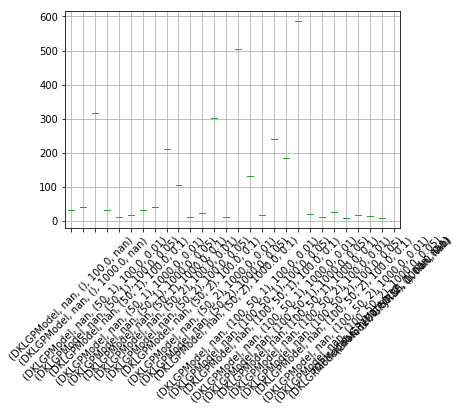

In [170]:
# Box plot for each obj_func, comparing models (sorted)

# multi_df[multi_df['model'] == 'DKLGPModel']
rmse = multi_df['rmse_mean']
rmse[rmse.columns[0]].apply(lambda x: pd.Series(x)).T.boxplot(rot=45)

{'exp_hash': '4962f94147e32bc49605621d0c9232bc519dd75a',
 'gp_samples': 1000,
 'gp_use_derivatives': False,
 'model': {'kwargs': {'learning_rate': 0.01,
                      'n_iter': 1000,
                      'nn_kwargs': {'layers': [100, 50, 2]},
                      'noise': 0.01},
           'name': 'DKLGPModel'},
 'model_hash': '2d39a5264910441a7b503542126a858e8bfbdcde',
 'obj_func': {'name': 'Kink2D'},
 'seed': 98596602,
 'verbosity': {'bo_show_iter': 30, 'plot': False}}


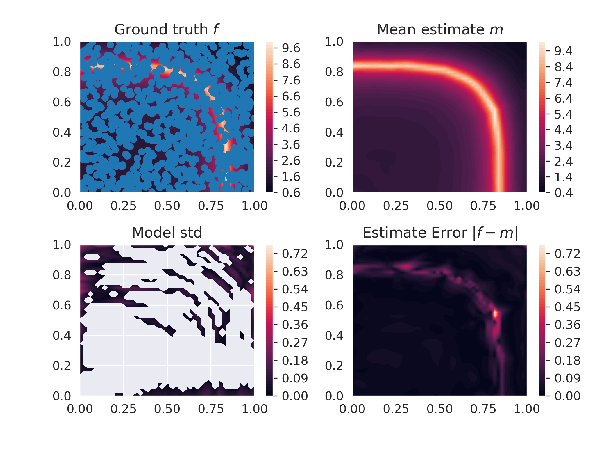

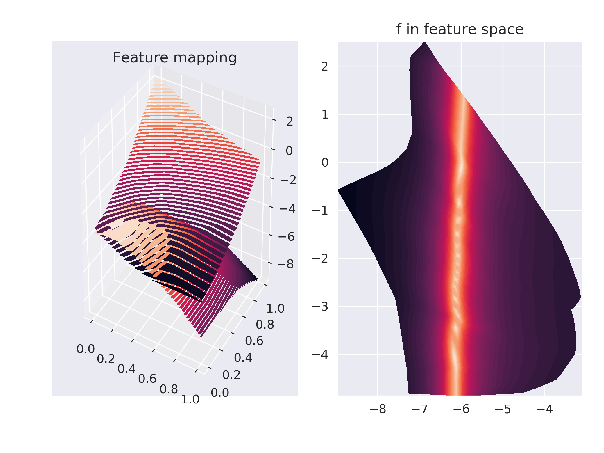

In [131]:
# select EXP_HASH
# We learn embedding. But what about lengthscale? Try on 1D where lengthscale is varying.
import pprint 

exp = exps_rows_df.loc['4962f94147e32bc49605621d0c9232bc519dd75a']
exp = exp.exps[0]
pprint.pprint(exp.config)
for name, artifact in exp.artifacts.items():
    artifact.show()

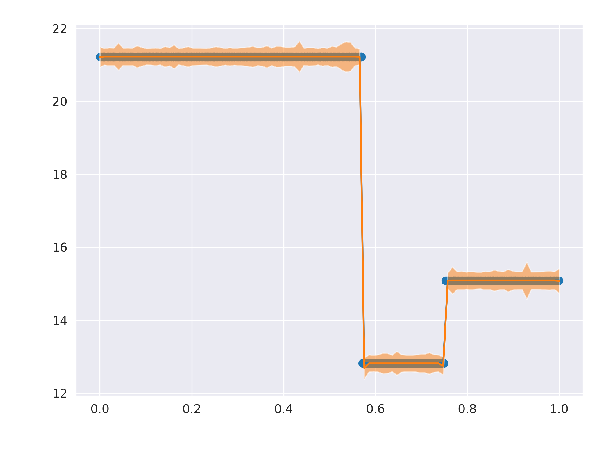

In [115]:
exp = exps_rows_df.loc['1140aeabb548f878cd07592d2061cbcde1e4012a']
exp = exp.exps[0]
for name, artifact in exp.artifacts.items():
    artifact.show()

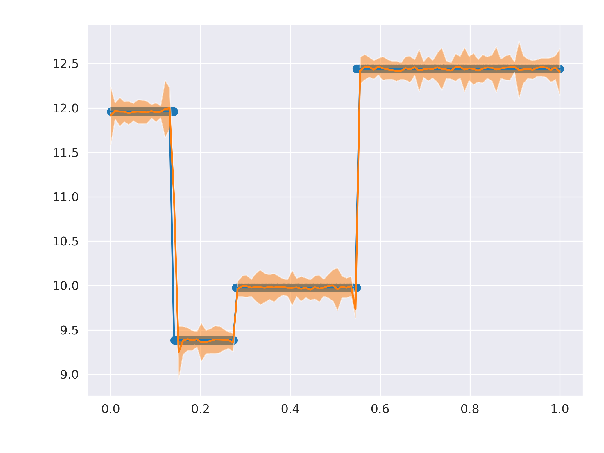

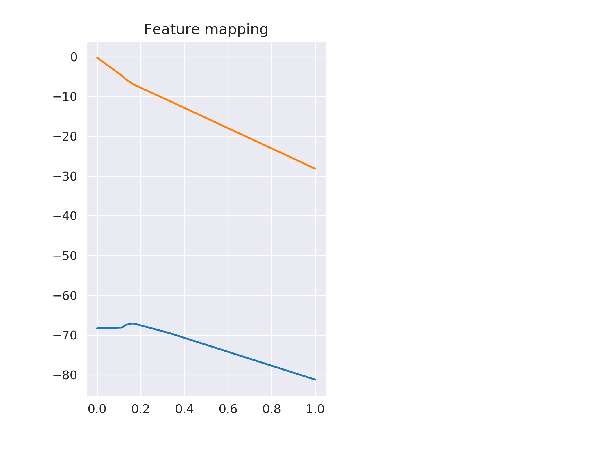

In [113]:
exp = exps_rows_df.loc['5173104e348f102cf1478d6066119d4d23293a79']
exp = exp.exps[0]
for name, artifact in exp.artifacts.items():
    artifact.show()

# (Temporary) Dumbster for scripting...

In [852]:
import numpy as np

D = 2
N_new = 5
N = 10

A = np.ones((N,D,D))
B = np.ones((N, N_new))
C = np.tensordot(B, A, axes=(0,0))
C.shape

(5, 2, 2)

/Users/tmpethick/anaconda3/envs/lions/lib/python3.6/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [684]:
# Dirty hack to filter out last experiment of curvature
exps_rows_df.exps.iloc['60519fa6dbfe5a80969a4b30ddd14cafbf68612f'] = exps_rows_df.exps.iloc['60519fa6dbfe5a80969a4b30ddd14cafbf68612f'][:-1]

TypeError: Cannot index by location index with a non-integer key

In [543]:
Lambda = np.identity(D)
(Lambda @ C)

array([[[10., 10.],
        [10., 10.]],

       [[10., 10.],
        [10., 10.]],

       [[10., 10.],
        [10., 10.]],

       [[10., 10.],
        [10., 10.]],

       [[10., 10.],
        [10., 10.]]])

In [558]:
N = 2
D = 2
N_new = 3
A = np.arange(N * D).reshape(N, D)
B = np.arange(N_new * D).reshape(N_new, D)

(A[:, None, :] - B[None, :, :])

array([[[ 0,  0],
        [-2, -2],
        [-4, -4]],

       [[ 2,  2],
        [ 0,  0],
        [-2, -2]]])

In [523]:
X_new = np.arange(5 * 2).reshape((5, 2))
X = np.arange(10 * 2).reshape((10, 2))

np.einsum('ik,jk->ijk', X_new, -X).shape

(5, 10, 2)

In [538]:
X = np.arange(5)
La = np.ones(5 * 5).reshape((5, 5))
np.einsum("ij,i->i", La, X)

array([ 0.,  5., 10., 15., 20.])

In [527]:
# Summing a and b
k_Xx = np.ones((N_new, N, D))
Ones = np.ones((N_new, N, D, D))
alpha = np.ones((N, 1))

np.einsum("ijkl,ijk->ikl", Ones, k_Xx * alpha)
np.einsum("jik,jik->ik", k_Xx, k_Xx)

array([[5., 5.],
       [5., 5.],
       [5., 5.],
       [5., 5.],
       [5., 5.],
       [5., 5.],
       [5., 5.],
       [5., 5.],
       [5., 5.],
       [5., 5.]])

# Single experiment explorer

In [872]:
# Find the latest (using internal api of loader...)
exp = loader._runs.find().sort([('timestamp', -1)]).limit(1)[0]
exp = loader._make_experiment(exp)

In [66]:
exp

Experiment(id=1, name=lions)

In [17]:
#exp = loader.find_by_id(-1)

def artifact_to_numpy(artifact):
    return np.load(artifact.file)

X = artifact_to_numpy(exp.artifacts['X.npy'])
Y = artifact_to_numpy(exp.artifacts['Y.npy'])

bo_plots_dict = get_bo_plots(exp)
bo_plots = [bo_plots_dict[k] for k in sorted(bo_plots_dict.keys())]

KeyError: 'X.npy'

In [875]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

@interact(i=(0, len(bo_plots)-1))
def show_bo_plot(i):
    bo_plots[i].show()

interactive(children=(IntSlider(value=0, description='i', max=1), Output()), _dom_classes=('widget-interact',)…

In [877]:
exp.metrics['rmse'].plot()

KeyError: 'rmse'

## Reconstruct model

In [ ]:
# TODO:
# runner (in reconstruction mode)
# refit model

# Dangour Zone! (Used to clean mongodb)

In [32]:
for exp in loader.find({}):
    exp.delete()#confirmed=True)